<a href="https://colab.research.google.com/github/rchi8/bayesian-optimization-baby-code/blob/main/BayesianOptimizationBabyCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

<ipython-input-11-64ad626e4ca8>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'b-', color='blue')


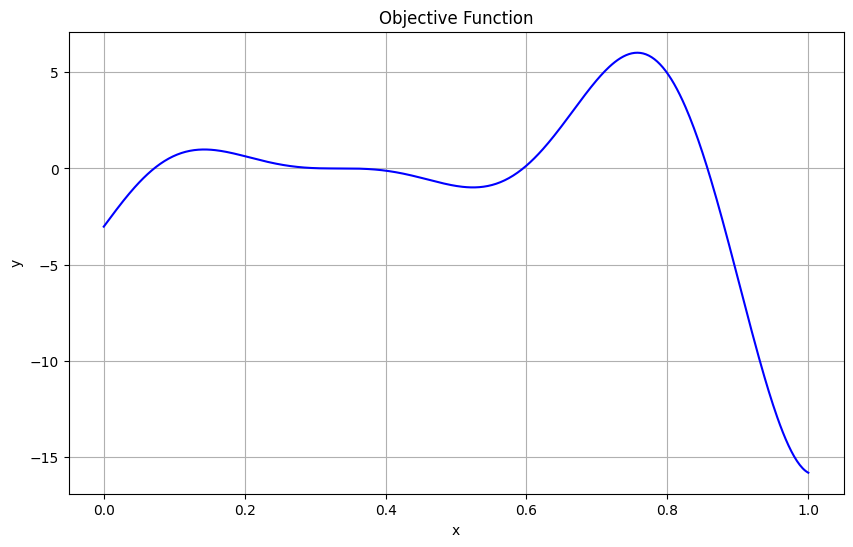

In [11]:
# 目的関数
def function(x):
  return -(6*x-2)**2*np.sin(12*x-4)

# 描画
x = np.linspace(0, 1, 500)
y = function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', color='blue')
plt.title('Objective Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

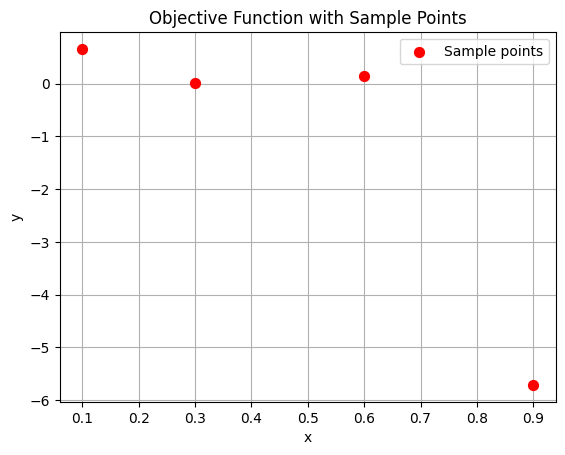

In [13]:
# 初期サンプル
X_sample = np.array([[0.1], [0.3], [0.6], [0.9]])
y_sample = function(X_sample).ravel()    # 結果を一次元配列化

# サンプル点を赤丸で描画
plt.scatter(X_sample, y_sample, c='red', s=50, zorder=5, label='Sample points')

# グラフ設定
plt.title('Objective Function with Sample Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# グラフを表示
plt.show()

In [46]:
# ガウス過程回帰
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

gp.fit(X_sample, y_sample)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

In [47]:
# 予測と評価
x = np.atleast_2d(np.linspace(0, 1, 1000)).T
y_pred, sigma = gp.predict(x, return_std=True)

In [18]:
len(sigma)

1000

In [48]:
# 次のサンプル点の選定
y_sample_max = np.max(y_sample)
improvement = y_pred.ravel() - y_sample_max

x_next = x[np.argmax(improvement)]
x_next

array([0.14214214])

In [49]:
# サンプルの更新
x_new = x_next
y_new = function(x_new)

X_sample = np.vstack([X_sample, x_new])
y_sample = np.append(y_sample, y_new)

In [27]:
X_sample = X_sample[:-1]

In [50]:
y_sample

array([ 0.65657677,  0.01557673,  0.14943781, -5.71195034, -1.18522412,
        0.96385196,  0.98323898,  0.98629489,  0.98629489,  0.98629489])

In [25]:
y_new

array([-1.18522412])

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessin

Approximated optimum: [0.13812104] 0.9832149642672601


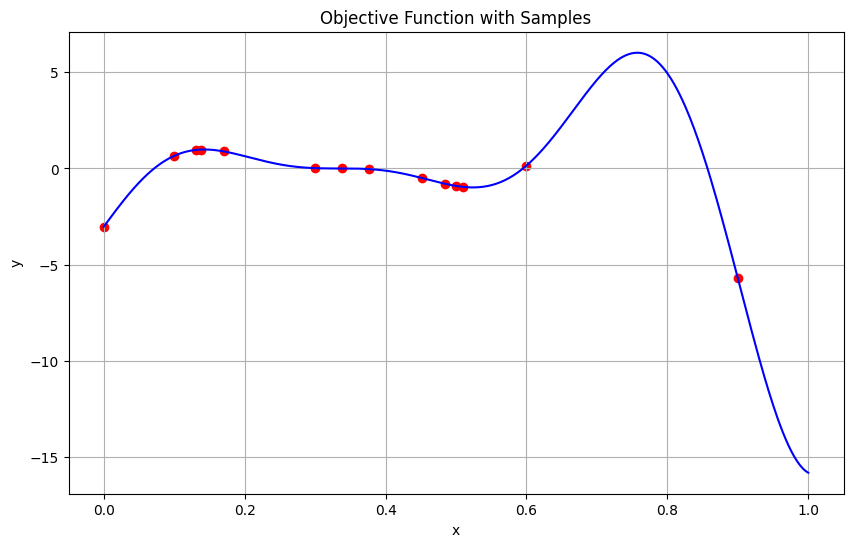

In [52]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 目的関数（最大化したい関数）
def function(x):
    return -(6*x-2)**2*np.sin(12*x-4)

# 獲得関数（Expected Improvement）
def acquisition_function(x, gp):
    mean, std = gp.predict(x.reshape(-1, 1), return_std=True)
    return -(mean - np.max(gp.predict(X_sample)) - 0.01) / std

# 初期サンプル
X_sample = np.array([[0.1], [0.3], [0.6], [0.9]])
y_sample = function(X_sample).ravel()

# ガウス過程の設定
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# 100サイクルの最適化
for i in range(10):
    gp.fit(X_sample, y_sample)

    # 獲得関数を最小化するxを見つける
    x_next = minimize(acquisition_function, x0=0.5, bounds=[(0, 1)], args=(gp)).x

    # 新しいサンプル点で目的関数を評価
    y_next = function(x_next)

    # サンプルデータを更新
    X_sample = np.vstack([X_sample, x_next])
    y_sample = np.append(y_sample, y_next)

# 最適なパラメータを出力
print("Approximated optimum:", X_sample[np.argmax(y_sample)], np.max(y_sample))

# 結果のプロット
x = np.linspace(0, 1, 500)
y = function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue')
plt.scatter(X_sample, function(X_sample), c='red')
plt.title('Objective Function with Samples')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessin

Approximated optimum: [0.14501831] 0.9854377288252508


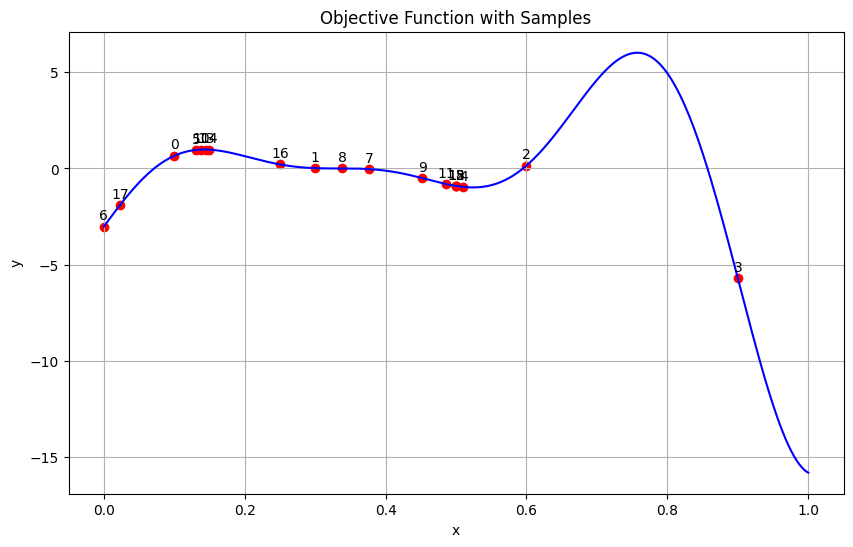

In [55]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 目的関数（最大化したい関数）
def function(x):
    return -(6*x-2)**2*np.sin(12*x-4)

# 獲得関数（Expected Improvement）
def acquisition_function(x, gp):
    mean, std = gp.predict(x.reshape(-1, 1), return_std=True)
    return -(mean - np.max(gp.predict(X_sample)) - 0.01) / std

# 初期サンプル
X_sample = np.array([[0.1], [0.3], [0.6], [0.9]])
y_sample = function(X_sample).ravel()

# ガウス過程の設定
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# 10サイクルの最適化
for i in range(15):
    gp.fit(X_sample, y_sample)

    # 獲得関数を最小化するxを見つける
    x_next = minimize(acquisition_function, x0=0.5, bounds=[(0, 1)], args=(gp)).x

    # 新しいサンプル点で目的関数を評価
    y_next = function(x_next)

    # サンプルデータを更新
    X_sample = np.vstack([X_sample, x_next])
    y_sample = np.append(y_sample, y_next)

# 最適なパラメータを出力
print("Approximated optimum:", X_sample[np.argmax(y_sample)], np.max(y_sample))

# 結果のプロット
x = np.linspace(0, 1, 500)
y = function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue')
plt.scatter(X_sample, function(X_sample), c='red')

# 点に番号をつける
for i, txt in enumerate(X_sample):
    plt.annotate(i, (X_sample[i], function(X_sample[i])), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Objective Function with Samples')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
